In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
AlphaList = np.loadtxt('CoupledLorenz_Alpha_Done.txt')
df = pd.read_csv("Lorenz_Score_BIC.csv", index_col = 0)
print(df.head())

BestThreshold = df.loc[df['BIC'].idxmin()]['Threshold']

print("Best threshold is", BestThreshold)
BestCoeff = AlphaList[df["Threshold"] == BestThreshold,:]
print("Corresponding coefficients are", BestCoeff[0][0].round(5), "for the noise and ", BestCoeff[0][1:].round(2), "for the drift terms.")

InitialCoeff = AlphaList[0,:] # without Hyperparameters


            BIC  Threshold
0  -9887.112470       0.00
1 -11047.867116       0.25
2 -11047.867116       0.50
3 -11047.867116       0.75
4  63386.796834       1.00
Best threshold is 0.5
Corresponding coefficients are 2.01573 for the noise and  [  0.   -10.05  10.02   0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.    27.92
  -1.02   0.     0.     0.     0.     0.     0.    -1.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.    -0.94   0.     0.    -2.63
   0.     0.     0.     0.     1.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.    -0.99   0.     0.    -9.02  10.01
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0. 

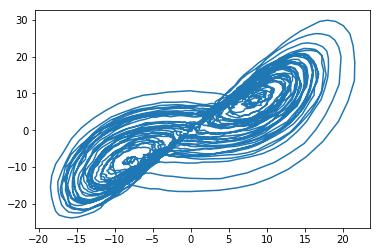

In [3]:
Data = np.load("CoupledLorenz_dt0.01.npy")
plt.plot(Data[:,0], Data[:,1])
plt.show()

def minmax(X):
    return([min(X), max(X)])

x1min, x1max = minmax(Data[:,0])
y1min, y1max = minmax(Data[:,1])
z1min, z1max = minmax(Data[:,2])
x2min, x2max = minmax(Data[:,3])
y2min, y2max = minmax(Data[:,4])
z2min, z2max = minmax(Data[:,5])

In [4]:
Ranges = list([minmax(Data[:,i]) for i in range(Data.shape[1])])
print(Ranges)

[[-18.45703552765081, 21.573520054269125], [-23.78242217007588, 29.857520312583347], [0.279390925201506, 54.51253715620424], [-22.001947005944537, 18.870860043630053], [-27.00306112389287, 22.124165994406898], [3.2413105253577283, 52.13384973363475]]


In [5]:
x1, y1, z1, x2, y2, z2 = symbols("x1, y1, z1, x2, y2, z2")

In [6]:
BestCoeff = BestCoeff[0][1:].reshape(6,-1)

In [7]:
BestCoeff[0]

array([  0.        , -10.04699585,  10.01900156,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [8]:
Base = list([x1, y1, z1, x2, y2, z2])

In [9]:
def GetPoly3(List, Coeff, Constant = False):
    # takes List of (linear) base functions [x1, x2, x3,..] and 
    # their polynomial coefficients Coeff of third order
    # returns a sympy polynomial
    # if Constant = True: the first Coeff[0] is used as constant
    
    Out = Integer(0)
    Index = 0 # iterating over the Coefficients
    Dim = len(List)
    
    if Constant:
        Out += Coeff[Index]
        Index +=1
    
    for i in range(Dim): # linear
        Out += Coeff[Index] * List[i]
        Index +=1
    
    for i in range(Dim): # quadratic
        for j in range(i,Dim):
            Out +=Coeff[Index] * List[i] * List[j]
            Index +=1
            
    for i in range(Dim): # cubic
        for j in range(i,Dim):
            for k in range(j,Dim):
                Out += Coeff[Index] * List[i] * List[j] * List[k]
                Index +=1
    return(Out)

In [10]:
# for maximum order = 2

def GetPoly(List, Coeff, Constant = False):
    # takes List of (linear) base functions [x1, x2, x3,..] and 
    # their polynomial coefficients Coeff of third order
    # returns a sympy polynomial
    # if Constant = True: the first Coeff[0] is used as constant
    
    Out = Integer(0)
    Index = 0 # iterating over the Coefficients
    Dim = len(List)
    
    if Constant:
        Out += Coeff[Index]
        Index +=1
    
    for i in range(Dim): # linear
        Out += Coeff[Index] * List[i]
        Index +=1
    
    for i in range(Dim): # quadratic
        for j in range(i,Dim):
            Out +=Coeff[Index] * List[i] * List[j]
            
            Index +=1
    return(Out)

In [11]:
GetPoly(Base, BestCoeff[0])

-10.0469958524349*y1 + 10.0190015574354*z1

In [12]:
Polyx1 = GetPoly(Base, BestCoeff[0],Constant=True)
Polyy1 = GetPoly(Base, BestCoeff[1],Constant=True)
Polyz1 = GetPoly(Base, BestCoeff[2],Constant=True)
Polyx2 = GetPoly(Base, BestCoeff[3],Constant=True)
Polyy2 = GetPoly(Base, BestCoeff[4],Constant=True)
Polyz2 = GetPoly(Base, BestCoeff[5],Constant=True)
Polyz2

1.0033322762165*x2*y2 - 2.6759166720388*z2

In [13]:
def CheckInfluences(Function, ranges, names, rounding = True ):
    # Takes sympy Function with definition volume defined by ranges = list [[x0min, x0max],[x1min,x1max],...]
        # optional: names = list of sympy symbols of the variable names
    # returns the Causal Integral for marginalising over x0, for x1, for x2, ...
    Dimen = len(ranges)
    Output = pd.DataFrame({"Variable":(),
                           "Influence":()})
        
    for i in range(Dimen):
        
        Marginal = (ranges[i][1]-ranges[i][0])**(-1)* integrate(Function, 
                                                                (names[i], 
                                                                 ranges[i][0], 
                                                                 ranges[i][1]) )
        
        Integrand = (Marginal - Function)**2
        
        for j in range(Dimen):
            Integrand = integrate(Integrand, 
                                  (names[j],
                                   ranges[j][0], 
                                   ranges[j][1]))
        
        Name = names[i]
        
        Output = Output.append(pd.DataFrame({"Variable": [names[i]],
                                            "Influence": [float(Integrand)]}),
                              ignore_index=True)
        
    Volume = np.prod(np.array(ranges)[:,1] -np.array(ranges)[:,0]) # Normalisation
    Output["Influence"] = Output["Influence"]/Volume
    if rounding:
        Output["Influence"] = Output["Influence"].round(2)
    
    return(Output)

### For dx1/dt

In [14]:
Causal_x1 = CheckInfluences(Polyx1, Ranges, Base)
print(Causal_x1)

  Variable  Influence
0       x1   13479.52
1       y1   24068.24
2       z1       0.00
3       x2       0.00
4       y2       0.00
5       z2       0.00


### For dy1/dt

In [15]:
Causal_y1 = CheckInfluences(Polyy1, Ranges, Base)
print(Causal_y1)

  Variable  Influence
0       x1   32601.87
1       y1     249.09
2       z1   33145.21
3       x2       0.00
4       y2       0.00
5       z2       0.00


### Loop

In [16]:
Polylist = list([Polyx1, Polyy1, Polyz1, 
                 Polyx2, Polyy2, Polyz2])

for i in range(len(Polylist)):
    print(i, Polylist[i])

0 -10.0469958524349*x1 + 10.0190015574354*y1
1 -0.997291883042209*x1*z1 + 27.9249323828618*x1 - 1.0192457189892*y1
2 0.999314875589434*x1*y1 - 2.63452644240326*z1 - 0.940689198199856
3 -0.987067634325909*x1 - 9.02133137691313*x2 + 10.0081908614283*y2
4 -1.0006222590216*x2*z2 + 27.9905425447835*x2 - 0.994678127825262*y2
5 1.0033322762165*x2*y2 - 2.6759166720388*z2


In [17]:


HeatMatrix = np.empty((Data.shape[1],
                       Data.shape[1]))

for i in range(Data.shape[1]):
    print(Base[i])
    CheckCausal = CheckInfluences(Polylist[i], Ranges, Base)
    print(CheckCausal)
    HeatMatrix[i,:] = CheckCausal["Influence"]
    print(" # # # # #")

x1
  Variable  Influence
0       x1   13479.52
1       y1   24068.24
2       z1       0.00
3       x2       0.00
4       y2       0.00
5       z2       0.00
 # # # # #
y1
  Variable  Influence
0       x1   32601.87
1       y1     249.09
2       z1   33145.21
3       x2       0.00
4       y2       0.00
5       z2       0.00
 # # # # #
z1
  Variable  Influence
0       x1   33204.79
1       y1   32555.77
2       z1    1701.19
3       x2       0.00
4       y2       0.00
5       z2       0.00
 # # # # #
x2
  Variable  Influence
0       x1     130.11
1       y1       0.00
2       z1       0.00
3       x2   11329.98
4       y2   20145.33
5       z2       0.00
 # # # # #
y2
  Variable  Influence
0       x1       0.00
1       y1       0.00
2       z1       0.00
3       x2   27778.56
4       y2     198.99
5       z2   28256.04
 # # # # #
z2
  Variable  Influence
0       x1       0.00
1       y1       0.00
2       z1       0.00
3       x2   29020.45
4       y2   28682.69
5       z2    1426.43
 # 

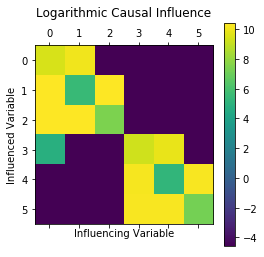

In [18]:
plt.matshow(np.log(HeatMatrix+0.01))
plt.xlabel("Influencing Variable")
plt.ylabel("Influenced Variable")
plt.colorbar()
plt.title("Logarithmic Causal Influence", y=1.13)
#ax.set_xticklabels(['']+Base)
plt.show()

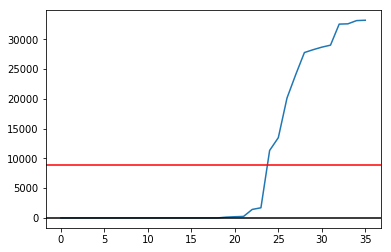

In [19]:
plt.plot(np.sort(HeatMatrix.reshape(1,-1)[0]))
plt.axhline(np.mean(np.sort(HeatMatrix.reshape(1,-1)[0])), color="red")
plt.axhline(np.median(np.sort(HeatMatrix.reshape(1,-1)[0])), color="black")

plt.show()

## Now with the worse parameter estimation

In [20]:
InitialCoeff = InitialCoeff[1:].reshape(6,-1)

In [21]:
Polylist2 = list([GetPoly(Base, InitialCoeff[i],Constant=True) for i in range(Data.shape[1])])

HeatMatrix2 = np.empty((Data.shape[1],
                       Data.shape[1]))

for i in range(Data.shape[1]):
    print(Base[i])
    CheckCausal = CheckInfluences(Polylist2[i], Ranges, Base)
    print(CheckCausal)
    HeatMatrix2[i,:] = CheckCausal["Influence"]
    print(" # # # # #")

x1
  Variable  Influence
0       x1   13862.53
1       y1   24558.67
2       z1       2.34
3       x2       3.05
4       y2       3.09
5       z2       6.37
 # # # # #
y1
  Variable  Influence
0       x1   32604.64
1       y1     237.69
2       z1   33172.02
3       x2      12.20
4       y2      13.14
5       z2      14.14
 # # # # #
z1
  Variable  Influence
0       x1   34892.23
1       y1   34050.44
2       z1    1571.31
3       x2      10.29
4       y2       5.29
5       z2       2.54
 # # # # #
x2
  Variable  Influence
0       x1     128.81
1       y1      21.16
2       z1       5.97
3       x2   11473.39
4       y2   20288.76
5       z2      12.57
 # # # # #
y2
  Variable  Influence
0       x1      17.87
1       y1      13.48
2       z1       6.95
3       x2   28198.48
4       y2     216.86
5       z2   28684.21
 # # # # #
z2
  Variable  Influence
0       x1      15.28
1       y1      21.43
2       z1      12.18
3       x2   30063.41
4       y2   29737.48
5       z2    1304.43
 # 

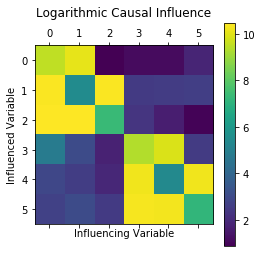

In [22]:
plt.matshow(np.log(HeatMatrix2+0.01))
plt.xlabel("Influencing Variable")
plt.ylabel("Influenced Variable")
plt.colorbar()
plt.title("Logarithmic Causal Influence", y=1.13)
#ax.set_xticklabels(['']+Base)
plt.show()

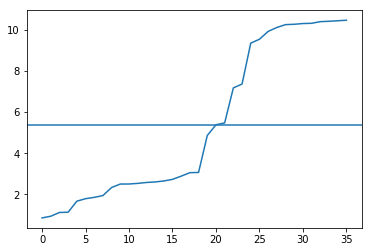

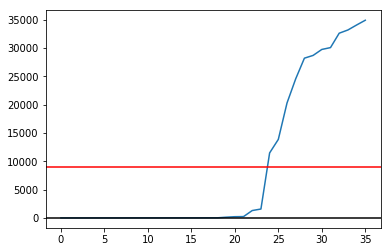

In [23]:
LogHeat = np.log(HeatMatrix2+0.01).reshape(1,-1)[0]
plt.plot(np.sort(LogHeat))
plt.axhline(np.mean(LogHeat))
plt.show()

plt.plot(np.sort(HeatMatrix2.reshape(1,-1)[0]))
plt.axhline(np.mean(np.sort(HeatMatrix2.reshape(1,-1)[0])), color="red")
plt.axhline(np.median(np.sort(HeatMatrix2.reshape(1,-1)[0])), color="black")

plt.show()